<a href="https://colab.research.google.com/github/sumanth18949/hyperparameter/blob/main/DNA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib seaborn scikit-learn -q

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [43]:
model_simple = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model_simple.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

model_simple.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history_simple = model_simple.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2
)

test_loss, test_acc = model_simple.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy (Simple CNN): {test_acc:.4f}")


Epoch 1/10
782/782 - 65s - 83ms/step - accuracy: 0.4842 - loss: 1.4319 - val_accuracy: 0.5471 - val_loss: 1.2687
Epoch 2/10
782/782 - 63s - 81ms/step - accuracy: 0.5625 - loss: 1.2359 - val_accuracy: 0.6111 - val_loss: 1.1024
Epoch 3/10
782/782 - 61s - 78ms/step - accuracy: 0.6071 - loss: 1.1154 - val_accuracy: 0.6355 - val_loss: 1.0384
Epoch 4/10
782/782 - 61s - 78ms/step - accuracy: 0.6380 - loss: 1.0288 - val_accuracy: 0.6639 - val_loss: 0.9651
Epoch 5/10
782/782 - 81s - 104ms/step - accuracy: 0.6595 - loss: 0.9676 - val_accuracy: 0.6707 - val_loss: 0.9362
Epoch 6/10
782/782 - 63s - 80ms/step - accuracy: 0.6766 - loss: 0.9149 - val_accuracy: 0.6751 - val_loss: 0.9154
Epoch 7/10
782/782 - 60s - 77ms/step - accuracy: 0.6907 - loss: 0.8775 - val_accuracy: 0.6714 - val_loss: 0.9362
Epoch 8/10
782/782 - 85s - 109ms/step - accuracy: 0.7037 - loss: 0.8377 - val_accuracy: 0.6772 - val_loss: 0.9341
Epoch 9/10
782/782 - 63s - 80ms/step - accuracy: 0.7163 - loss: 0.8041 - val_accuracy: 0.6932 

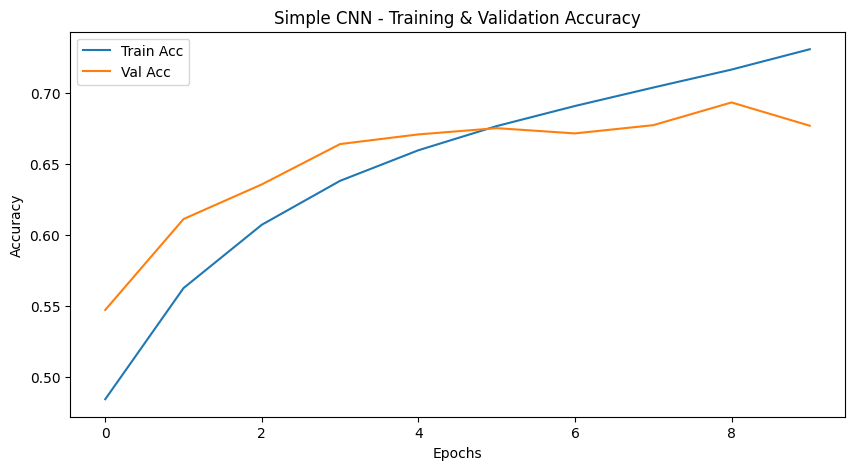

In [47]:
plt.figure(figsize=(10,5))
plt.plot(history_simple.history['accuracy'], label='Train Acc')
plt.plot(history_simple.history['val_accuracy'], label='Val Acc')
plt.title('Simple CNN - Training & Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.show()

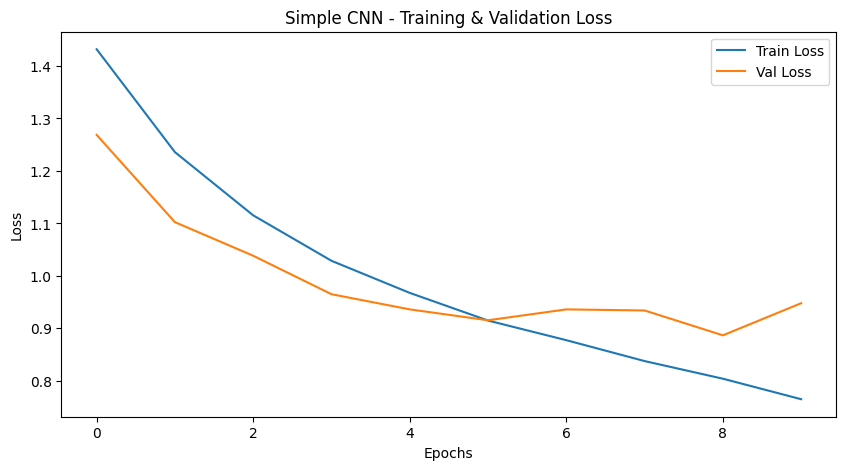

In [48]:
plt.figure(figsize=(10,5))
plt.plot(history_simple.history['loss'], label='Train Loss')
plt.plot(history_simple.history['val_loss'], label='Val Loss')
plt.title('Simple CNN - Training & Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend(); plt.show()

In [49]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

preds = model_simple.predict(x_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


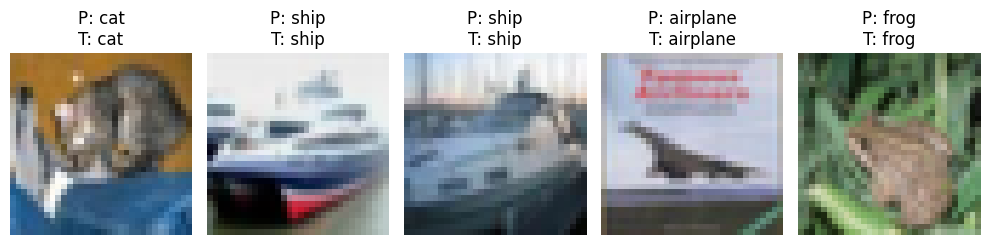

In [50]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"P: {class_names[pred_labels[i]]}\nT: {class_names[true_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()